In [155]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
import pdfkit


In [156]:
pip install pdfkit


Note: you may need to restart the kernel to use updated packages.


<ul>
<li><a href="#Size30">Size30</a></li>
<li><a href="#Size40">Size40</a></li>
<li><a href="#Size50">Size50</a></li>
<li><a href="#Size60">Size60</a></li>
<li><a href="#Size70">Size70</a></li>
</ul>

In [157]:
# Reading the BankNote_Authentication.csv file
data = pd.read_csv("BankNote_Authentication.csv")


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [159]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [160]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [161]:
# shuffling data
data = data.sample(frac=1)

In [162]:
data.head()

,variance,skewness,curtosis,entropy,class
469,0.1848,6.5079,2.01330,-0.872420,0
1203,-6.7387,6.9879,0.67833,-7.588700,1
1025,-1.1022,-5.8395,4.56410,0.687050,1
632,3.6941,-3.9482,4.26250,1.157700,0
479,2.0962,2.4769,1.93790,-0.040962,0


In [163]:
y = data['class'].to_numpy()
x = data.drop(columns = ['class']).to_numpy()
x ,y

(array([[ 0.1848 ,  6.5079 ,  2.0133 , -0.87242],
        [-6.7387 ,  6.9879 ,  0.67833, -7.5887 ],
        [-1.1022 , -5.8395 ,  4.5641 ,  0.68705],
        ...,
        [ 1.3754 ,  8.8793 , -1.9136 , -0.53751],
        [ 0.64215,  3.1287 ,  4.2933 ,  0.64696],
        [ 3.4312 ,  6.2637 , -1.9513 , -0.36165]]),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64))

In [164]:
print(x.shape)
print(y.shape)

(1372, 4)
(1372,)


In [165]:
# 1) Experiment with a fixed train_test split ratio:Use 25% of the samples for training and the rest for testing.

# Import Library for splitting data
from sklearn.model_selection import train_test_split

# Creating Train and Test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50, train_size=0.25)

In [166]:
# 1) Experiment with a fixed train_test split ratio:Use 25% of the samples for training and the rest for testing.
# Creating Train and Test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, train_size=0.25)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
# Predict Accuracy Score
y_pred = clf.predict(x_test)
treeObj = clf.tree_

In [168]:
print("Train data accuracy:",(accuracy_score(y_true = y_train, y_pred=clf.predict(x_train)) * 100))
print("Test data accuracy:",(accuracy_score(y_true = y_test, y_pred=y_pred)) * 100)
print( "The size of tree :", treeObj.node_count)

Train data accuracy: 100.0
Test data accuracy: 95.14091350826045
The size of tree : 27


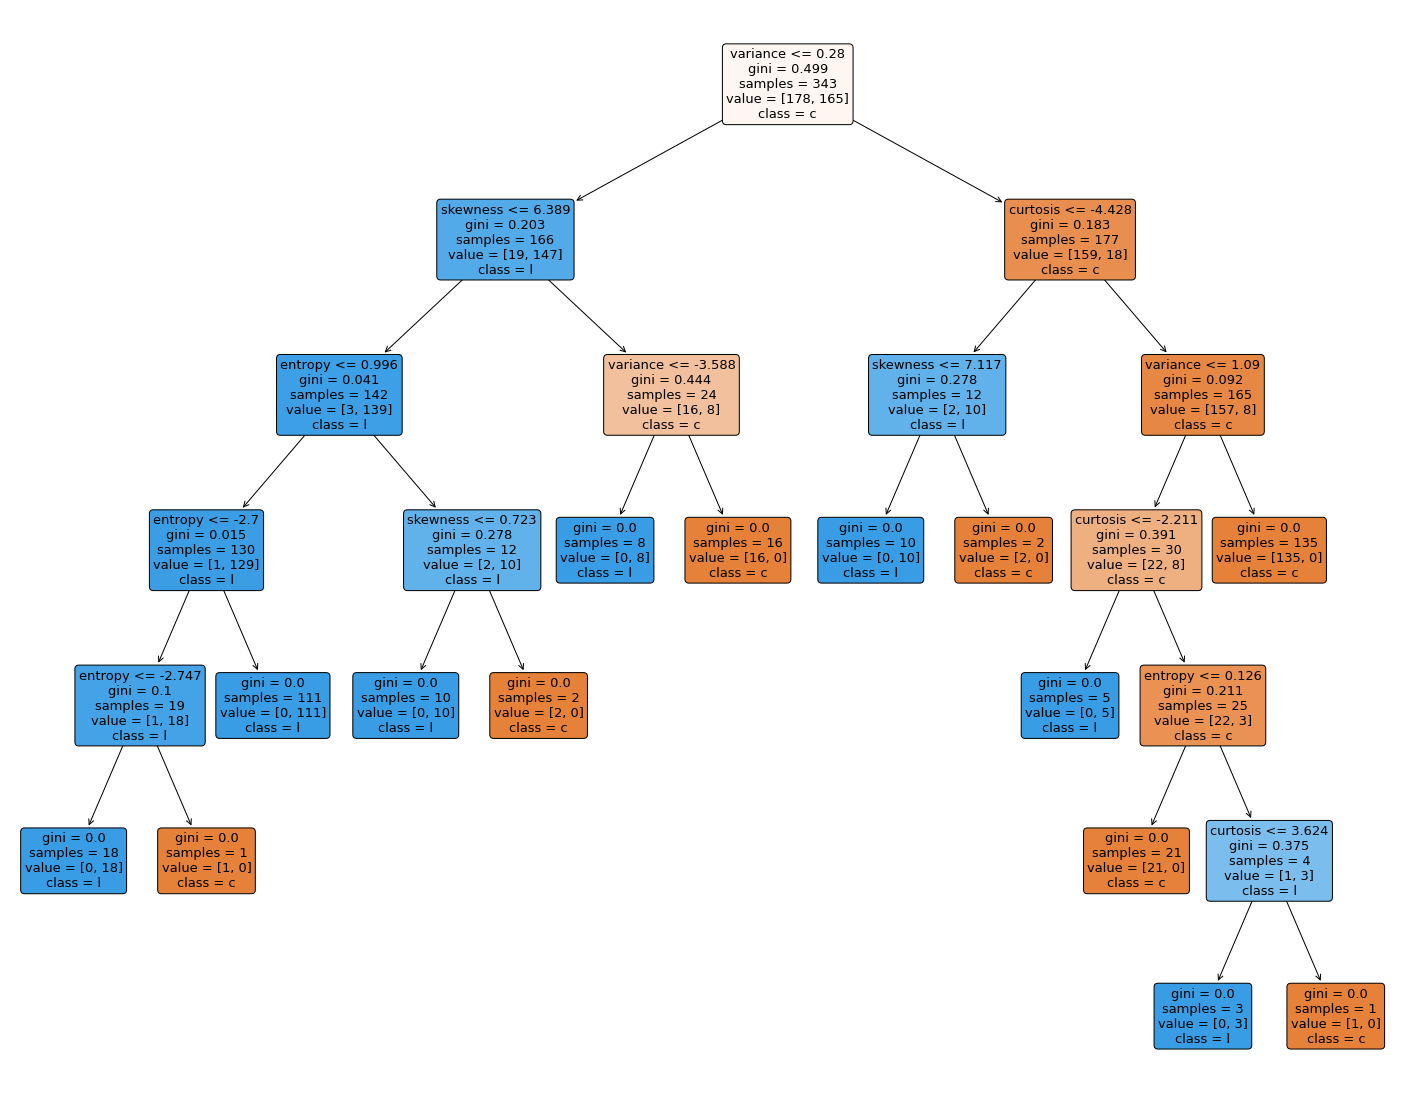

In [169]:
fig = plt.figure(figsize=(25,20))
feature_name = data.columns[:4]
_ = tree.plot_tree(clf, 
                   feature_names=feature_name,  
                   class_names='class',
                   filled=True, 
                   rounded = True,
                  fontsize= 13)